In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import csv
import folium
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# sklearn: 
# Import necessary packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import plotly.graph_objs as go
import plotly as plt
import seaborn as sns
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


# folium: 
from folium import plugins
from folium.plugins import HeatMap



import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import pandas as pd

# Pretty display for notebooks
%matplotlib inline


In [4]:
accidents= pd.read_csv('gdrive/MyDrive/Road Safety Data Accident 2019.csv', low_memory=False,dtype={'Accident_index':'int','LSOA_of_Accident_Location':'str'})

In [5]:
# assesment of missing data: 
accidents.isnull().sum(axis = 0)

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [6]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [7]:
vehicles= pd.read_csv('gdrive/MyDrive/Road Safety Data Vehicles 2019.csv', low_memory=False,dtype={'Accident_index':'int'})

In [8]:
casualties= pd.read_csv('gdrive/MyDrive/Road Safety Data Casualties 2019.csv', low_memory=False,dtype={'Accident_index':'int'})

# **DATA CLEANING/ PREPROCESSING**

In [9]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%d/%m/%Y")

In [10]:
# check
accidents.iloc[:, 5:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Police_Force                117536 non-null  int64         
 1   Accident_Severity           117536 non-null  int64         
 2   Number_of_Vehicles          117536 non-null  int64         
 3   Number_of_Casualties        117536 non-null  int64         
 4   Date                        117536 non-null  datetime64[ns]
 5   Day_of_Week                 117536 non-null  int64         
 6   Time                        117473 non-null  object        
 7   Local_Authority_(District)  117536 non-null  int64         
 8   Local_Authority_(Highway)   117536 non-null  object        
 9   1st_Road_Class              117536 non-null  int64         
 10  1st_Road_Number             117536 non-null  int64         
 11  Road_Type                   117536 non-

In [11]:
accidents.replace(-1, 'NaN', inplace=True)
casualties.replace(-1, 'NaN', inplace=True)
vehicles.replace(-1, 'NaN', inplace=True)

In [12]:
# merge vehicle data using key (Accident_Index)
accidents = pd.merge(accidents,vehicles[['Accident_Index','Vehicle_Type','Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver','Vehicle_Manoeuvre', 'Age_of_Vehicle']],on='Accident_Index', how='left')


In [13]:
accidents_cleanup = ['Longitude','Time','Number_of_Casualties','Speed_limit', 'Junction_Detail', 'Did_Police_Officer_Attend_Scene_of_Accident','Light_Conditions', 'Road_Type',
                          'Did_Police_Officer_Attend_Scene_of_Accident','Weather_Conditions', 
                          'Road_Surface_Conditions', 'Special_Conditions_at_Site','Carriageway_Hazards', 
                          'Urban_or_Rural_Area', 'Accident_Severity', '1st_Road_Class', 
                          'Pedestrian_Crossing-Human_Control', 
                          'Pedestrian_Crossing-Physical_Facilities', 
                          'Police_Force','Vehicle_Type','Sex_of_Driver', 'Age_of_Driver', 
                          'Vehicle_Manoeuvre','LSOA_of_Accident_Location']

accidents_cleanup_outliers = ['Sex_of_Driver', 'Age_Band_of_Driver']
outliers_list = ['6 - 10', '0 - 5', 'Not known']

In [14]:
# method to clean spesific features, and remove linked data points in other datasets: 
def clean_data (cleanup_features, df, df2, df3): 
    for feature in cleanup_features: 
        accidents_data_list = df[(df[feature].isnull()) | (df[feature] == 'NaN')].Accident_Index.tolist()
        df = df[~df.Accident_Index.isin(accidents_data_list)]
        df2 = df2[~df2.Accident_Index.isin(accidents_data_list)]
        df3 = df3[~df3.Accident_Index.isin(accidents_data_list)]
    return df, df2, df3

In [15]:
# method to remove outliers from spesific features, and remove linked data points in other datasets: 
def clean_outliers (cleanup_outliers, outliers_list, df, df2, df3): 
    for feature in cleanup_outliers: 
        accidents_data_list = df[(df[feature].isin (outliers_list))].Accident_Index.tolist()
        df = df[~df.Accident_Index.isin(accidents_data_list)]
        df2 = df2[~df2.Accident_Index.isin(accidents_data_list)]
        df3 = df3[~df3.Accident_Index.isin(accidents_data_list)]
    return df, df2, df3

In [16]:
# remove dublicate 
accidents.drop_duplicates(subset='Accident_Index', keep='first', inplace=True)

In [17]:
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,58,9,NaN,NaN,NaN,2,1,2
1,2019010128300,2,9,0,NaN,NaN,NaN,NaN,NaN,NaN,...,6,3,NaN,NaN,NaN,NaN,NaN,2,1,2
2,2019010152270,1,9,0,18,NaN,0,NaN,NaN,NaN,...,6,2,24,5,NaN,NaN,NaN,3,1,3
3,2019010152270,2,9,0,18,NaN,0,NaN,NaN,NaN,...,6,3,NaN,NaN,NaN,NaN,NaN,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,NaN,NaN,NaN,4,1,4


In [18]:
print ('accidents_data drop duplicates:', accidents.shape[0])
print ('casualties_data drop duplicates:', casualties.shape[0])
print ('vehicles_data drop duplicates:', vehicles.shape[0])

accidents_data drop duplicates: 117536
casualties_data drop duplicates: 153158
vehicles_data drop duplicates: 216381


In [19]:
# removing rows with missing values/outliers and their linked vehicles/casualties data
accidents, casualties, vehicles = clean_data(accidents_cleanup, accidents, casualties, vehicles)
accidents, casualties, vehicles = clean_outliers(accidents_cleanup_outliers, outliers_list, accidents, casualties, vehicles)

In [20]:
# time series features: 
accidents['Year'] = accidents.Date.dt.year 
accidents['Month_number'] = accidents.Date.dt.month
accidents['Month'] = accidents.Date.dt.month_name()
accidents['Hour'] = accidents.apply(lambda x: str(x.Time).split(':')[0], axis=1)

In [21]:


# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [22]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [23]:
# create a little dictionary to later look up the groups 
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [24]:
#created a temporary column
accidents['Day_time'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Day_time']].head()

,Time,Hour,Day_time
4,01:50,1,5
6,01:20,1,5
7,00:40,0,5
9,02:45,2,5
11,01:35,1,5


In [25]:
accidents['Day_time']

4         5
6         5
7         5
9         5
11        5
         ..
206364    3
206367    2
206370    5
206371    2
206372    3
Name: Day_time, Length: 91277, dtype: object

In [26]:
# drop old time column and temporary hour column
accidents = accidents.drop(columns=['Time', 'Hour'])

In [27]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents), 3), '%')

Proportion of Missing Values in Accidents Table: 0.0 %


In [28]:
#accidents = accidents.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR', 
                                    #'Longitude', 'Latitude', 'LSOA_of_Accident_Location'])

# drop remaining records with NaN's
accidents = accidents.dropna()



In [29]:
for col in set(accidents.columns) - set(accidents.describe().columns):
    accidents[col] = accidents[col].astype('category')

In [30]:
# combine the accidents with the vehicles table
df_M = pd.merge(accidents[['Accident_Index', 'Accident_Severity','Day_time', 'Speed_limit', 'Urban_or_Rural_Area','Age_of_Driver', 'Vehicle_Manoeuvre','LSOA_of_Accident_Location', 'Did_Police_Officer_Attend_Scene_of_Accident','Weather_Conditions', 
                         'Number_of_Casualties','Road_Surface_Conditions', 'Road_Type', 'Light_Conditions']], 
              casualties[['Accident_Index', 'Casualty_Type','Casualty_Severity','Sex_of_Casualty', 'Age_of_Casualty']],
              
              on='Accident_Index')

df_M.isna().sum()

Accident_Index                                 0
Accident_Severity                              0
Day_time                                       0
Speed_limit                                    0
Urban_or_Rural_Area                            0
Age_of_Driver                                  0
Vehicle_Manoeuvre                              0
LSOA_of_Accident_Location                      0
Did_Police_Officer_Attend_Scene_of_Accident    0
Weather_Conditions                             0
Number_of_Casualties                           0
Road_Surface_Conditions                        0
Road_Type                                      0
Light_Conditions                               0
Casualty_Type                                  0
Casualty_Severity                              0
Sex_of_Casualty                                0
Age_of_Casualty                                0
dtype: int64

In [31]:
# define categorical feature columns
category_cols = ['Day_time', 'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area','Number_of_Casualties', 'Casualty_Type','Did_Police_Officer_Attend_Scene_of_Accident',
                 'Weather_Conditions','Road_Surface_Conditions', 'Light_Conditions']

# define target col
target_col = ['Casualty_Severity']

cols = category_cols  + target_col

# copy dataframe - just to be safe
df = df_M[cols].copy()
df.shape

(121801, 11)

In [32]:
df.head(20)

,Day_time,Road_Type,Speed_limit,Urban_or_Rural_Area,Number_of_Casualties,Casualty_Type,Did_Police_Officer_Attend_Scene_of_Accident,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Casualty_Severity
0,5,6,30,1,1,1,1,1,1,4,3
1,5,6,20,1,1,0,1,1,1,4,2
2,5,6,30,1,2,9,1,1,1,4,3
3,5,6,30,1,2,9,1,1,1,4,3
4,5,3,30,1,3,9,1,1,1,4,3
5,5,3,30,1,3,9,1,1,1,4,3
6,5,3,30,1,3,9,1,1,1,4,3
7,5,6,30,1,1,0,1,1,1,4,3
8,5,6,20,1,5,9,1,1,1,4,3
9,5,6,20,1,5,9,1,1,1,4,3


In [33]:
#create dummy variables from the categorical features
dummies = pd.get_dummies(df[category_cols], drop_first=True)
df = pd.concat([ df[target_col], dummies], axis=1)
df.shape

(121801, 43)

In [34]:
# Train Test Split
y = df['Casualty_Severity']
X = df.drop('Casualty_Severity', axis=1)

In [35]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# **MODELLING**

In [36]:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=.25,random_state=1)
    return X_train, y_train

In [37]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, 
error_score='raise')
    return scores

In [38]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['rcf'] = RandomForestClassifier()
    models['nb'] = MultinomialNB()
  
    
    return models

In [39]:
X, y = get_dataset()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.784 (0.003)
>knn 0.782 (0.004)
>lr 0.811 (0.002)
>rcf 0.799 (0.003)
>nb 0.810 (0.001)


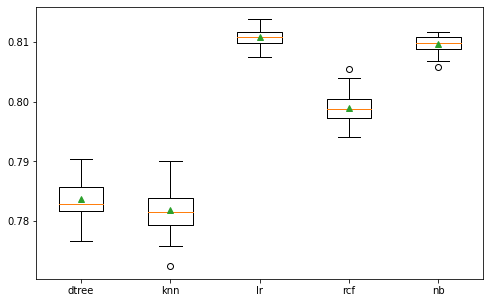

In [40]:
plt.figure(figsize=(8,5))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [41]:
#will be using RandomForest and logisticregression

In [42]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((68512, 42), (22838, 42))

In [44]:
# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

In [45]:
# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)

# train
forest_1.fit(X_train, y_train)

# predict
y_test_preds  = forest_1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest : \n', report)

Classification Report Random Forest : 
               precision    recall  f1-score   support

           1       0.16      0.03      0.05       279
           2       0.39      0.12      0.18      4076
           3       0.82      0.96      0.89     18483

    accuracy                           0.80     22838
   macro avg       0.46      0.37      0.37     22838
weighted avg       0.74      0.80      0.75     22838



In [46]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', n_jobs=-1)

array([0.37363513, 0.36704606, 0.37628591, 0.36007192, 0.37353067])

In [47]:
forest_1.predict_proba(X_test)[:,1]

array([0.        , 0.46177855, 0.        , ..., 0.17999854, 0.28845568,
       0.32312147])

In [48]:
import sklearn.metrics as metrics


In [49]:
cf_matrix = metrics.confusion_matrix(y_test, y_test_preds)
print(cf_matrix)

[[    9    64   206]
 [   18   485  3573]
 [   31   686 17766]]


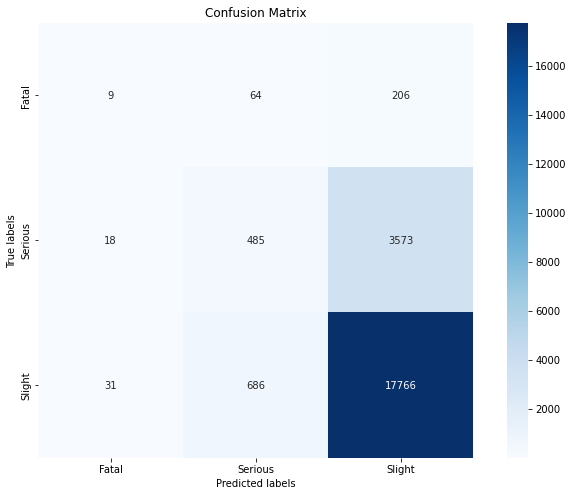

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, square=True, annot=True, cmap='Blues',fmt='d',cbar=True);
#labels, title and ticks

ax= plt.subplot()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fatal', 'Serious', 'Slight']); ax.yaxis.set_ticklabels(['Fatal', 'Serious', 'Slight']);

**Identify Important Features**
We can also check the important features by using the feature_importances_ variable from the random forest algorithm in scikit-learn.

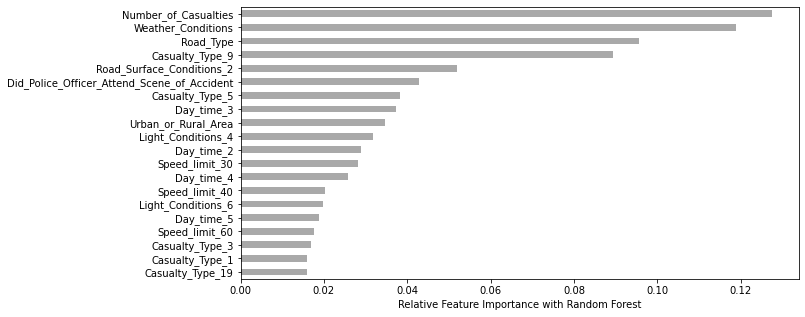

In [51]:
# plot the important features
feat_importances = pd.Series(forest_1.feature_importances_, index=X.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');

In [52]:
from imblearn.over_sampling import SMOTE



In [53]:
# view previous class distribution
print('Before Upsampling with SMOTE:'), print(df['Casualty_Severity'].value_counts())

oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X, y)

# view synthetic sample class distribution
print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_resample).value_counts())

Before Upsampling with SMOTE:
3    98538
2    21720
1     1543
Name: Casualty_Severity, dtype: int64

After Upsampling with SMOTE:
3    73859
2    73859
1    73859
Name: Casualty_Severity, dtype: int64


(None, None)

In [54]:
# then perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, random_state=0)

In [55]:
# instantiate second RandomForestClassifier with entropy and SMOTE
forest_2 = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)

# train
forest_2.fit(X_train, y_train)

# predict
y_test_preds = forest_2.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest and SMOTE Upsampling: \n', report)

Classification Report Random Forest and SMOTE Upsampling: 
               precision    recall  f1-score   support

           1       0.71      0.85      0.77     18678
           2       0.61      0.57      0.59     18309
           3       0.70      0.61      0.65     18408

    accuracy                           0.68     55395
   macro avg       0.67      0.68      0.67     55395
weighted avg       0.67      0.68      0.67     55395



In [56]:
cf_matrix = metrics.confusion_matrix(y_test, y_test_preds)
print(cf_matrix)

[[15868  1843   967]
 [ 4036 10353  3920]
 [ 2397  4722 11289]]


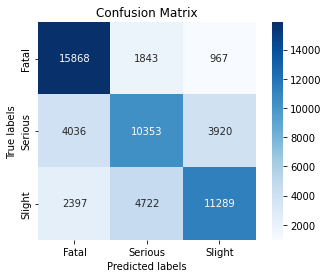

In [57]:
sns.heatmap(cf_matrix, square=True, annot=True, cmap='Blues',fmt='d',cbar=True);
#labels, title and ticks

ax= plt.subplot()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fatal', 'Serious', 'Slight']); ax.yaxis.set_ticklabels(['Fatal', 'Serious', 'Slight']);

# **CONVERTING PREDICTIONS TO DATAFRAME FORMAT WITH ACCIDENT INDEX**


In [58]:
data= df_M

In [59]:
#arcquiring the predictions
rf_model_pred = forest_2.predict_proba(X_test)

Severity_preds = pd.DataFrame(data=rf_model_pred, columns = ['Fatal', 'Serious', 'Slight'], index=X_test.index.copy())

# y_test['preds'] = rf_model_pred

Severity_pred = pd.merge(data , Severity_preds, left_index=True, right_index=True)


In [60]:
#this is the predicted probability for all classes
Casualty_Severity_Pred = Severity_pred[['Accident_Index','Fatal', 'Serious','Slight']]

In [61]:
Casualty_Severity_Pred

,Accident_Index,Fatal,Serious,Slight
0,2019010155191,0.030000,0.243513,0.726487
5,2019010155195,0.000000,0.046429,0.953571
12,2019010155198,0.000000,0.038824,0.961176
14,2019010155207,0.020542,0.900815,0.078643
17,2019010155216,0.492921,0.337641,0.169438
...,...,...,...,...
121785,201963DF01819,0.912449,0.052350,0.035201
121786,201963DF02019,0.645773,0.265346,0.088881
121793,201963DF02919,0.852195,0.063025,0.084780
121796,201963DF03019,0.645773,0.265346,0.088881


In [77]:
#export final result to csv

Casualty_Severity_Pred.to_csv('casualty.csv', index=False)

print('Exported!')

Exported!


In [63]:
#Casualty_Severity_Pred= forest_1.predict_proba(X_test)[:,1]

In [64]:
#Severity_result = pd.DataFrame({'id': X_test.index, 'RandomForest': Casualty_Severity_Pred})

#Severity_result

In [65]:
#Severity2_result= pd.DataFrame(forest_2.predict_proba(X_test), columns=['Fatal', 'Serious', 'Slight'])      #this is the predicted probability for all classes

In [ ]:
%matplotlib inline

# **LOGISTIC REGRESSION CLASSIFIER MODELLING**


In [67]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           1       0.58      0.70      0.63     18678
           2       0.52      0.34      0.41     18309
           3       0.57      0.64      0.60     18408

    accuracy                           0.56     55395
   macro avg       0.56      0.56      0.55     55395
weighted avg       0.56      0.56      0.55     55395



In [69]:
preds_yt = logmodel.predict(X_test)

In [70]:
lg_matrix = metrics.confusion_matrix(y_test, preds_yt)
print(lg_matrix)

[[13150  2461  3067]
 [ 6282  6256  5771]
 [ 3329  3324 11755]]


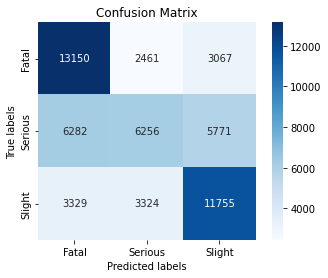

In [71]:

sns.heatmap(lg_matrix, square=True, annot=True, cmap='Blues',fmt='d',cbar=True);

ax= plt.subplot()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fatal', 'Serious', 'Slight']); ax.yaxis.set_ticklabels(['Fatal', 'Serious', 'Slight']);


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

import keras
from keras.models import Sequential
from keras.layers import Dense



In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense



In [74]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [75]:
#Initialising ANN
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [ ]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=20,epochs = 20)